# Prepare the data

This notebook is part of the group project work for the Information System and Big Data. The project is about predicting Autism from a given dataset of EEG signals recorded on 19 channels. Here we will go through the process of filtering the data (removing noise, artifacts) and preparing the dataset for further preprocessing.

Note: Тhis code will show the filtering for one instance only, the same analysis is further applied to all instances appropriately.

This project was made by: Simona Nikolovska (104/2020), David Atanasoski (14/2020), Sara Poptodorova (111/2020).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import matplotlib
from mne.io import RawArray
from mne import create_info
from mne.preprocessing import ICA

We start by loading one sample at a time, then define necessary parameters to form a raw object. Creating raw objects is needed for further analysis.

In [2]:
data = np.loadtxt('dataset/ASD/P047.txt')

# Define the sampling rate(around 45000 samples for 3 minutes -> 45000/180s)
sampling_rate = 250 

channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4',
                 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6',
                 'Fz', 'Cz', 'Pz']

info = create_info(channel_names, sfreq=sampling_rate, ch_types='eeg')

raw = RawArray(data.T, info)

raw.save('P047_raw.fif', overwrite=True)
raw

Creating RawArray with float64 data, n_channels=19, n_times=152106
    Range : 0 ... 152105 =      0.000 ...   608.420 secs
Ready.
Overwriting existing file.
Writing C:\Users\stojc\P047_raw.fif
Closing C:\Users\stojc\P047_raw.fif
[done]


<RawArray | 19 x 152106 (608.4 s), ~22.1 MB, data loaded>

In [3]:
matplotlib.use('Qt5Agg')

In [4]:
%matplotlib inline
# Load sensor positions (montage)
montage = mne.channels.make_standard_montage('standard_1005')
# Set the montage to the raw data
raw.set_montage(montage)

<RawArray | 19 x 152106 (608.4 s), ~22.1 MB, data loaded>

Using matplotlib as 2D backend.


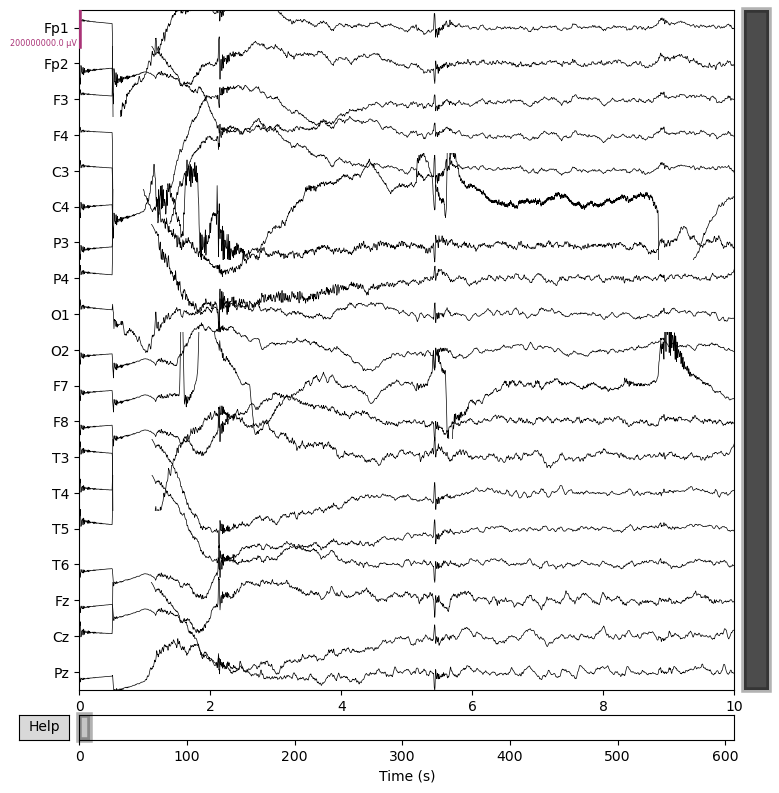

In [5]:
def plot_scaled(raw):
    scalings = {'eeg': 100, 'stim': 0.1}  # Example custom scaling factors
    raw.plot(scalings=scalings);
plot_scaled(raw)

We need to make sure that in the next steps there is no noise, so we are applying a band-pass filter. 
Generally used band-pass filter for EEG signals is from 1Hz to 40Hz, so we also applied that range.

In [6]:
raw.filter(l_freq=1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


<RawArray | 19 x 152106 (608.4 s), ~22.1 MB, data loaded>

Compare the signals, before and after applying band-pass filter.

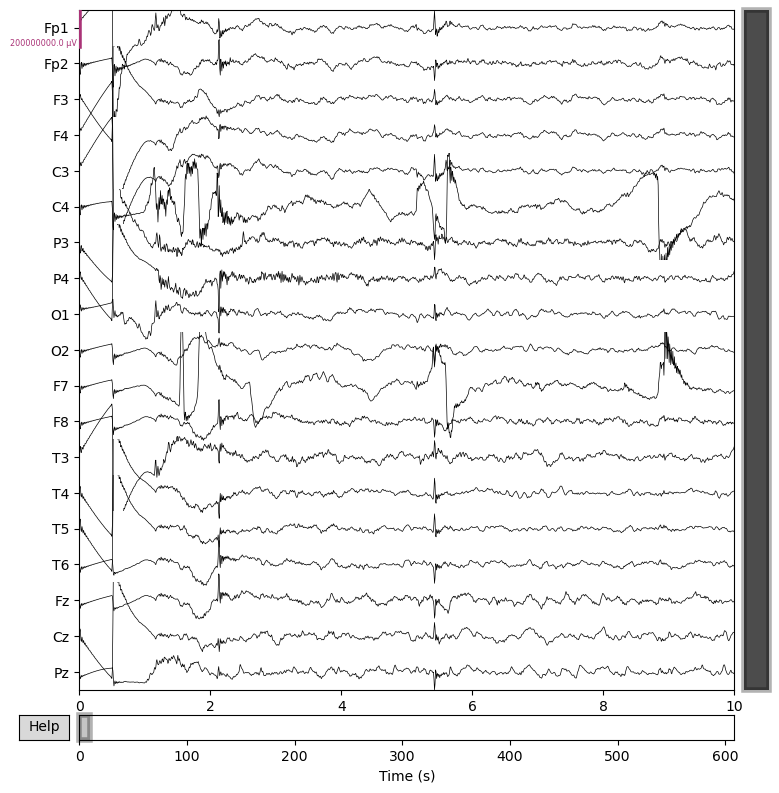

In [7]:
plot_scaled(raw)

For artifact removal (such as eye movements and motion) we are applying ICA filtering (Independent Component Analysis).

In [8]:
ica = mne.preprocessing.ICA(n_components=19, random_state=0)

In [9]:
ica.fit(raw.copy().filter(8, 40))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Selecting by number: 19 components
Fitting ICA took 4.4s.


C:\Users\stojc\AppData\Local\Temp\ipykernel_10764\1014783266.py:1: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (2.9) and smallest (3.2e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 18
  ica.fit(raw.copy().filter(8, 40))


Method,fastica
Fit,48 iterations on raw data (152106 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


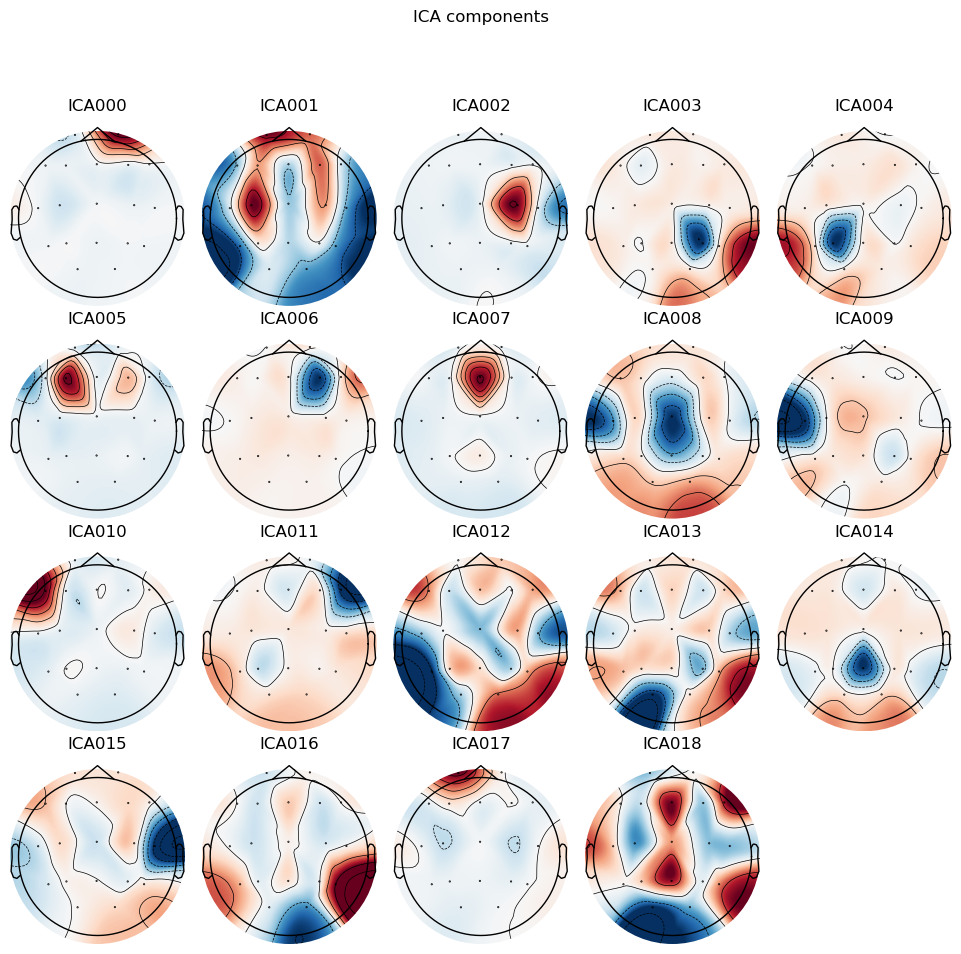

Creating RawArray with float64 data, n_channels=19, n_times=152106
    Range : 0 ... 152105 =      0.000 ...   608.420 secs
Ready.


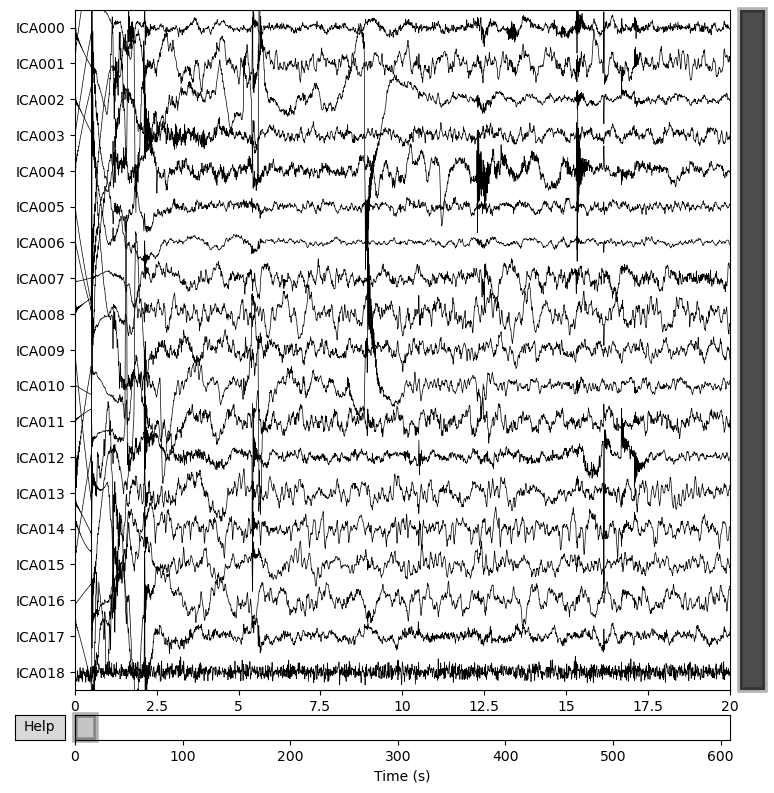

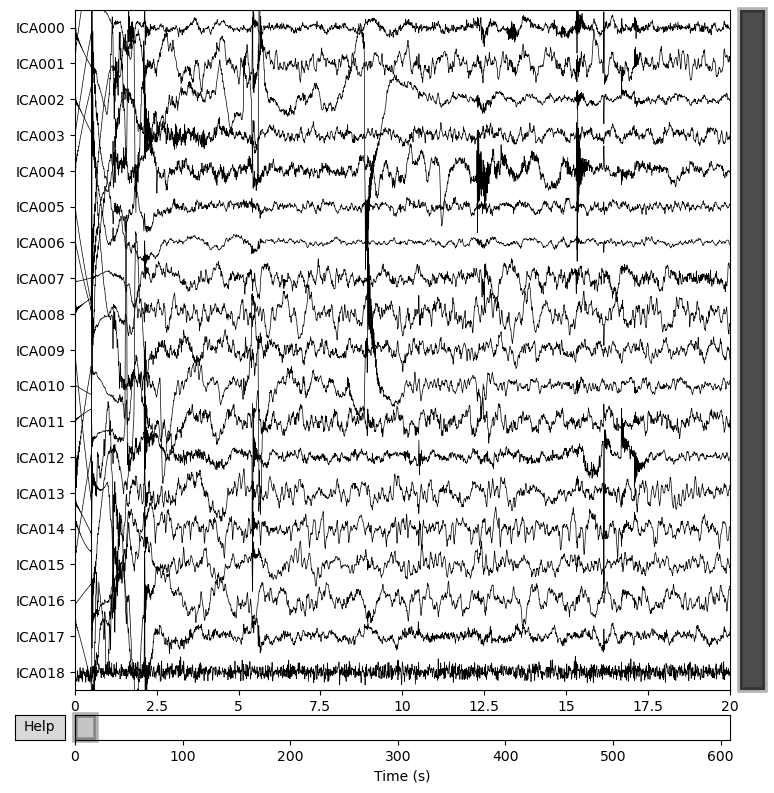

In [10]:
ica.plot_components();
ica.plot_sources(raw)

Excluding the unnecessary ICA components, according to analysis done by the ICA components above.

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 7 ICA components
    Projecting back using 19 PCA components


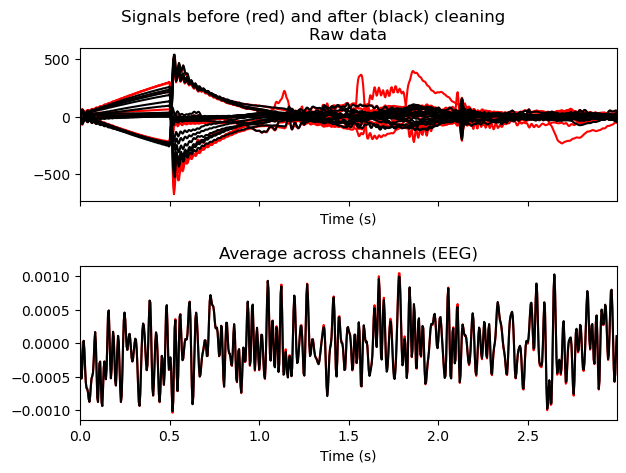

In [11]:
ica.exclude = [0,2,5,6,7,10,17]
ica.plot_overlay(raw, exclude=ica.exclude);

In [12]:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 7 ICA components
    Projecting back using 19 PCA components


<RawArray | 19 x 152106 (608.4 s), ~22.1 MB, data loaded>

Here we compare the signals before and after applying ICA filtering.

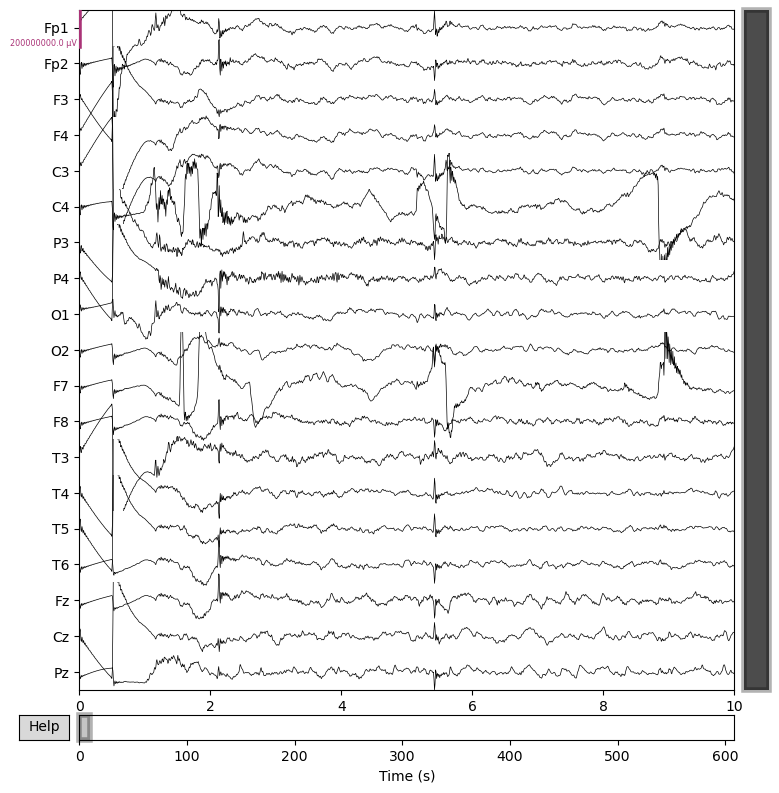

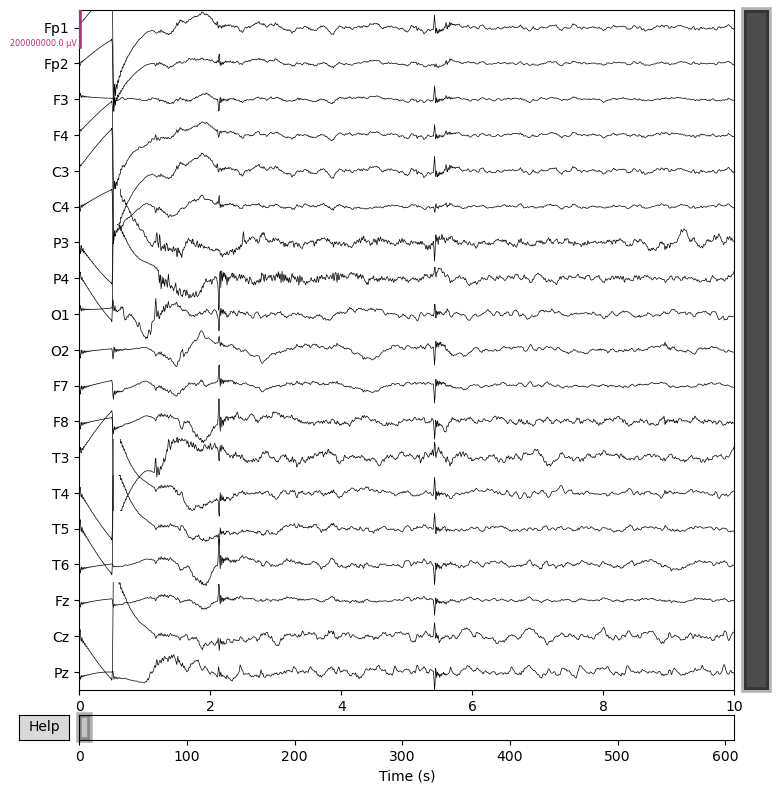

In [13]:
plot_scaled(raw)
plot_scaled(reconst_raw)

In [14]:
reconst_raw.save('P047_raw.fif', overwrite=True)

Overwriting existing file.
Writing C:\Users\stojc\P047_raw.fif
Closing C:\Users\stojc\P047_raw.fif
[done]
